# Linear Algebra Assignment

### Question 1
Using auto-mpg data, find the top 5 similar cars to toyota corona mark ii

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("auto-mpg.csv")
data['horsepower'] =  pd.to_numeric(data['horsepower'],  errors= 'coerce')
data.dropna(inplace=True)

features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_data = scaler.fit_transform(data[features])

car_name = 'toyota corona mark ii'
index = data[data["car name"] == car_name].index[0]

target_vector = feature_data[index]
dot_products = np.dot(feature_data, target_vector)
data["similarity"]= dot_products

top_5_similar = data[data['car name'] != car_name].sort_values(by="similarity", ascending=False)

print(top_5_similar[["car name", "similarity"]].head(5))

               car name  similarity
54          datsun 1200    8.295238
18         datsun pl510    8.170479
53  toyota corolla 1200    8.085904
71      mazda rx2 coupe    7.767721
29         datsun pl510    7.728701


### Question 2
Find completely unique/orthogonal car to toyota corona mark ii

In [2]:
# Your code here
data["orthogonality"] = dot_products

other_cars = data[data["car name"] != car_name]
most_orthogonal_car = other_cars.loc[other_cars["orthogonality"].idxmin()]

print(most_orthogonal_car[["car name", "orthogonality"]])


car name         oldsmobile cutlass ls
orthogonality                -6.777988
Name: 364, dtype: object


### Question 3
Project the data to a 2-dimentional space and visualize using scatter plot

Original data shape: (392, 10)
Projected data shape (2D): (392, 2)
Target variable 'y' not found. Scatter plot will not be colored by target.


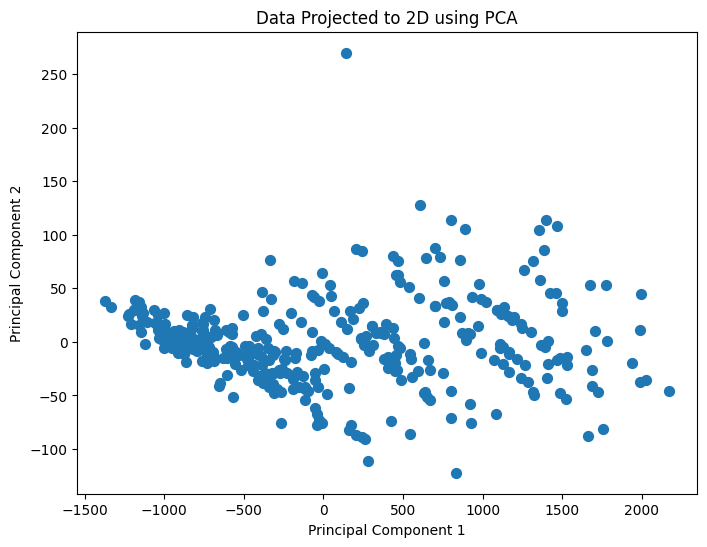

In [3]:
# Your code here
# Your code here
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

X = data.select_dtypes(include=np.number).dropna()

X_2d = pca.fit_transform(X)

print("Original data shape:", X.shape)
print("Projected data shape (2D):", X_2d.shape)

if 'y' in globals():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=50)
    plt.title("Data Projected to 2D using PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Target')
    plt.show()
else:
    print("Target variable 'y' not found. Scatter plot will not be colored by target.")
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], s=50)
    plt.title("Data Projected to 2D using PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()


### Question 4
Write a function that returns dot product of two list of numbers

In [4]:
def dot_product(a, b):
    return sum(x * y for x, y in zip(a, b))

a = [2, 4, 6]
b = [1, 3, 5]
result = dot_product(a, b)
print("Dot product of a and b:", result)

Dot product of a and b: 44


### Question 5
Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [5]:
def projection(a, b):
    dot_ab = sum(x * y for x, y in zip(a, b))
    dot_bb = sum(y * y for y in b)
    scalar = dot_ab / dot_bb if dot_bb != 0 else 0
    return [scalar * y for y in b]
proj = projection(a, b)
print("Projection of a onto b:", proj)

Projection of a onto b: [1.2571428571428571, 3.7714285714285714, 6.285714285714286]


### Question 6
Create a class Vector that supports addition, dot product, and magnitude.

In [11]:
class vector:
    def __init__(self, values):
        self.values = values

    def __add__(self, other):
        return vector([x + y for x, y in zip(self.values, other.values)])

    def dot(self, other):
        return sum(x * y for x, y in zip(self.values, other.values))

    def magnitude(self):
        return sum(x ** 2 for x in self.values) ** 0.5

v1 = vector ([1, 2, 3])
v2 = vector ([4, 5, 6])
v3 = v1 + v2
print("Addition:", v3.values)
print("Dot product:", v1.dot(v2))
print("Magnitude of v1:", v1.magnitude())

Addition: [5, 7, 9]
Dot product: 32
Magnitude of v1: 3.7416573867739413


### Question 7
Write a function that returns the L1 and L2 norms of a vector given as list

In [12]:
def vector_norms(v):
    l1 = sum(abs(x) for x in v)
    l2 = sum(x**2 for x in v) ** 0.5
    return l1, l2

l1, l2 = vector_norms(a)
print("L1 norm:", l1)
print("L2 norm:", l2)

L1 norm: 12
L2 norm: 7.483314773547883
